In [1]:
# kbo_schema ?

import sqlite3

# Connect to your KBO database
conn = sqlite3.connect('kbo_database.db')
cursor = conn.cursor()

# Get the full CREATE statements for all tables and indices
cursor.execute("SELECT type, name, sql FROM sqlite_master WHERE type IN ('table', 'index', 'view') ORDER BY type, name;")
schema_info = cursor.fetchall()

for obj_type, name, sql in schema_info:
    print(f"-- {obj_type.upper()}: {name}")
    if sql:
        print(sql)
        print()
    else:
        print("(no SQL statement)\n")

# Optionally: List all foreign keys for each table
print("\n--- Foreign Key Details ---")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]
for table in tables:
    cursor.execute(f"PRAGMA foreign_key_list('{table}')")
    fks = cursor.fetchall()
    if fks:
        print(f"\nTable: {table}")
        for fk in fks:
            print(f"  {fk}")

conn.close()


-- INDEX: 
CREATE INDEX "" ON "address" ("EntityNumber")

-- INDEX: EnterpriseNumber
CREATE INDEX "EnterpriseNumber" ON "establishment" ("EnterpriseNumber")

-- INDEX: EntityNumber
CREATE INDEX "EntityNumber" ON "activity" ("EntityNumber")

-- INDEX: EstablishmentNumber
CREATE INDEX "EstablishmentNumber" ON "establishment" ("EstablishmentNumber")

-- INDEX: branch_EnterpriseNumber_idx
CREATE INDEX "branch_EnterpriseNumber_idx" ON "branch" ("EnterpriseNumber")

-- INDEX: code_Code_idx
CREATE INDEX "code_Code_idx" ON "code" ("Code")

-- INDEX: contact_EntityNumber_idx
CREATE INDEX "contact_EntityNumber_idx" ON "contact" ("EntityNumber")

-- INDEX: denomination_EntityNumber_idx
CREATE INDEX "denomination_EntityNumber_idx" ON "denomination" ("EntityNumber")

-- INDEX: enterprise_EnterpriseNumber_idx
CREATE INDEX "enterprise_EnterpriseNumber_idx" ON "enterprise" ("EnterpriseNumber")

-- TABLE: activity
CREATE TABLE "activity" (
"EntityNumber" TEXT,
  "ActivityGroup" INTEGER,
  "NaceVersion"

In [ ]:
More info...

In [2]:
import sqlite3

db_path = 'kbo_database.db'
conn = sqlite3.connect(db_path)
cur = conn.cursor()

print("=== Tables and Columns ===")
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [r[0] for r in cur.fetchall()]

for table in tables:
    print(f"\nTable: {table}")
    cur.execute(f"PRAGMA table_info('{table}')")
    for col in cur.fetchall():
        print(f"  - {col[1]} ({col[2]})")  # col[1]=name, col[2]=type

print("\n=== Indices (PK/Unique/Other) ===")
cur.execute("SELECT name FROM sqlite_master WHERE type='index';")
indices = [r[0] for r in cur.fetchall()]

for idx in indices:
    print(f"\nIndex: {idx}")
    cur.execute(f"PRAGMA index_info('{idx}')")
    for info in cur.fetchall():
        print(f"  - column: {info[2]}")
    # Check if the index is unique
    cur.execute(f"PRAGMA index_list('{tables[0]}')")
    idx_list = cur.fetchall()
    for i in idx_list:
        if i[1] == idx:
            print(f"  - Unique: {'Yes' if i[2] else 'No'}")

conn.close()


=== Tables and Columns ===

Table: denomination
  - EntityNumber (TEXT)
  - Language (INTEGER)
  - TypeOfDenomination (INTEGER)
  - Denomination (TEXT)

Table: branch
  - Id (TEXT)
  - StartDate (TEXT)
  - EnterpriseNumber (TEXT)

Table: activity
  - EntityNumber (TEXT)
  - ActivityGroup (INTEGER)
  - NaceVersion (INTEGER)
  - NaceCode (INTEGER)
  - Classification (TEXT)

Table: establishment
  - EstablishmentNumber (TEXT)
  - StartDate (TEXT)
  - EnterpriseNumber (TEXT)

Table: address
  - EntityNumber (TEXT)
  - TypeOfAddress (TEXT)
  - CountryNL (TEXT)
  - CountryFR (TEXT)
  - Zipcode (TEXT)
  - MunicipalityNL (TEXT)
  - MunicipalityFR (TEXT)
  - StreetNL (TEXT)
  - StreetFR (TEXT)
  - HouseNumber (TEXT)
  - Box (TEXT)
  - ExtraAddressInfo (TEXT)
  - DateStrikingOff (TEXT)

Table: contact
  - EntityNumber (TEXT)
  - EntityContact (TEXT)
  - ContactType (TEXT)
  - Value (TEXT)

Table: meta
  - Variable (TEXT)
  - Value (TEXT)

Table: code
  - Category (TEXT)
  - Code (TEXT)
  - Langu

In [3]:
import sqlite3
conn = sqlite3.connect('kbo_database.db')
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)
conn.close()


[('denomination',), ('branch',), ('activity',), ('establishment',), ('address',), ('contact',), ('meta',), ('code',), ('enterprise',)]


Summary of the KBO Database Structure
Key Tables and Their Main Columns:
enterprise:

EnterpriseNumber (acts as unique ID for companies)

establishment:

EstablishmentNumber (branch ID), EnterpriseNumber (links to company)

branch:

Id, EnterpriseNumber

activity, address, denomination, contact:

All have EntityNumber (link field)

code:

Category, Code, Language, Description

meta:

Metadata about the dataset

Indices:
Indices on almost every linking field (e.g., EnterpriseNumber, EntityNumber, EstablishmentNumber)

No explicit PRIMARY KEY or FOREIGN KEY, but indices act as the relational "glue".

Example:

Index on EntityNumber in denomination, contact, activity, and address tables

Index on EnterpriseNumber in enterprise, establishment, branch

Index on EstablishmentNumber in establishment

Index on Code in code

How to Join / Analyze the Tables
Typical join logic:

To get all info about a company:

Join tables on EnterpriseNumber (main ID for companies)

To get all info about an establishment/branch:

Use EstablishmentNumber, then join to enterprise via EnterpriseNumber

To get all addresses, activities, contacts, denominations for a company:

Join via EntityNumber (assume this is same as EnterpriseNumber for those records)



In [8]:
!pip install jupysql

In [9]:
%load_ext sql
%sql sqlite:///kbo_database.db

Connecting to 'sqlite:///kbo_database.db'

In [10]:
%%sql

-- A. Get all company names and their addresses
SELECT e.EnterpriseNumber, a.StreetNL, a.MunicipalityNL, a.Zipcode
FROM enterprise e
LEFT JOIN address a ON e.EnterpriseNumber = a.EntityNumber
LIMIT 20;


Running query in 'sqlite:///kbo_database.db'

EnterpriseNumber,StreetNL,MunicipalityNL,Zipcode
0200.065.765,Panhuisstraat,Destelbergen,9070
0200.068.636,Stropstraat,Gent,9000
0200.171.970,Brabantdam,Gent,9000
0200.245.711,Hoge Buizemont,Geraardsbergen,9500
0200.305.493,Gentsesteenweg,Sint-Lievens-Houtem,9520
0200.362.210,Rue de la Religion,Nivelles,1400
0200.362.408,Rue du Cerf,Rixensart,1332
0200.420.410,Michel Theysstraat,Diest,3290
0200.420.608,Ieperstraat,Poperinge,8970
0200.448.421,Budastraat(Kor),Kortrijk,8500


In [15]:
%%sql

-- B. List all establishments (branches) for a given company
SELECT est.EstablishmentNumber, est.StartDate
FROM establishment est
WHERE est.EnterpriseNumber = '0200.065.765';




Running query in 'sqlite:///kbo_database.db'

EstablishmentNumber,StartDate
2.251.273.097,01-12-2015


In [18]:
%%sql

-- C. Show all activities for a company
SELECT act.NaceCode, act.Classification
FROM activity act
WHERE act.EntityNumber = '0200.065.765';

Running query in 'sqlite:///kbo_database.db'

NaceCode,Classification
84130,MAIN
70111,MAIN
68121,MAIN
84130,MAIN
41101,MAIN


In [19]:
%%sql

-- D. List all contacts for a company
SELECT c.ContactType, c.Value
FROM contact c
WHERE c.EntityNumber = '0200.065.765';



Running query in 'sqlite:///kbo_database.db'

ContactType,Value


In [20]:
%%sql

-- E. Find all companies in a specific postal code
SELECT e.EnterpriseNumber, a.Zipcode
FROM enterprise e
LEFT JOIN address a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.Zipcode = '1000';

Running query in 'sqlite:///kbo_database.db'

EnterpriseNumber,Zipcode
0200.882.050,1000
0202.962.701,1000
0203.071.973,1000
0203.201.340,1000
0203.211.040,1000
0203.286.759,1000
0203.375.049,1000
0206.048.091,1000
0206.492.907,1000
0206.694.528,1000


In [22]:
!pip install matplotlib


  Using cached matplotlib-3.10.3-cp311-cp311-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_10_9_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp311-cp311-macosx_10_10_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-macosx_10_12_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.2-cp311-cp311-macosx_10_9_x86_64.whl (269 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.9 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_10_9_x86_64.whl (66 kB)
Using cached pillow-11.3.0-cp311-cp311-macosx_10_10_x86_64.whl (5.3 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

Tables: ['denomination', 'branch', 'activity', 'establishment', 'address', 'contact', 'meta', 'code', 'enterprise']
  EnterpriseNumber Status  JuridicalSituation  TypeOfEnterprise  \
0     0200.065.765     AC                   0                 2   
1     0200.068.636     AC                   0                 2   
2     0200.171.970     AC                   0                 2   
3     0200.245.711     AC                  12                 2   
4     0200.305.493     AC                   0                 2   

   JuridicalForm  JuridicalFormCAC   StartDate  
0          416.0               NaN  09-08-1960  
1          417.0               NaN  16-02-1923  
2          116.0               NaN  01-01-1968  
3          116.0               NaN  01-01-1922  
4          416.0               NaN  19-03-1962  
Index(['EnterpriseNumber', 'Status', 'JuridicalSituation', 'TypeOfEnterprise',
       'JuridicalForm', 'JuridicalFormCAC', 'StartDate'],
      dtype='object')
Status values: ['AC']
Top 10

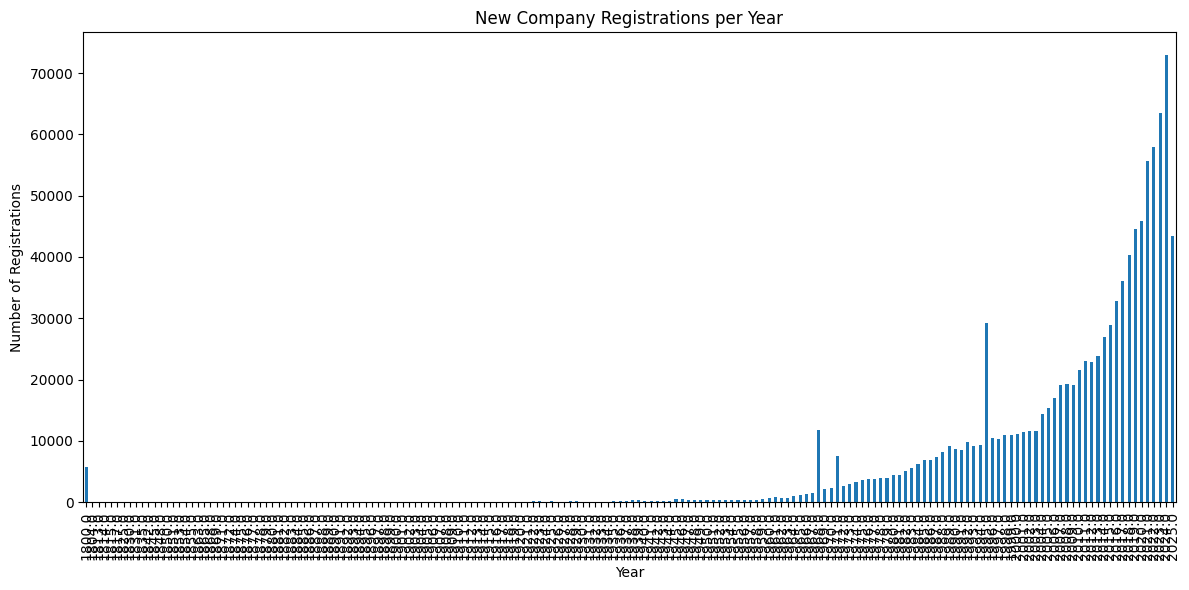

In [25]:
# Some extra analysis before we start with must have'schema_info
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1. Connect to the KBO database
conn = sqlite3.connect('kbo_database.db')

# 2. Inspect the tables available
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables:", tables['name'].to_list())

# 3. Load main company table (enterprise)
kbo_df = pd.read_sql_query("SELECT * FROM enterprise", conn)
print(kbo_df.head())
print(kbo_df.columns)

# 4. Basic Cleaning (drop duplicates, handle missing EnterpriseNumber)
kbo_df = kbo_df.drop_duplicates()
kbo_df = kbo_df.dropna(subset=['EnterpriseNumber'])

# 5. Filter by status (e.g., only active companies)
print("Status values:", kbo_df['Status'].unique())
active_kbo = kbo_df[kbo_df['Status'] == 'Active']

# 6. Sector Analysis (NACE codes, from activity table)
activity_df = pd.read_sql_query("SELECT * FROM activity", conn)
sector_counts = activity_df['NaceCode'].value_counts()
print("Top 10 NACE sectors:\n", sector_counts.head(10))

# 7. Geographic Analysis (by municipality, from address table)
address_df = pd.read_sql_query("SELECT * FROM address", conn)
municipality_counts = address_df['MunicipalityNL'].value_counts()
print("Top 10 municipalities:\n", municipality_counts.head(10))

# 8. Trend Analysis: Registrations per year (from enterprise table)
kbo_df['Year'] = pd.to_datetime(kbo_df['StartDate'], errors='coerce').dt.year
yearly_counts = kbo_df['Year'].value_counts().sort_index()
print("Registrations per year:\n", yearly_counts)

# Plot Registrations Over Time
plt.figure(figsize=(12,6))
yearly_counts.plot(kind='bar')
plt.title('New Company Registrations per Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.tight_layout()
plt.show()

# 9. Export results
sector_counts.to_csv('sector_counts.csv')
municipality_counts.to_csv('municipality_counts.csv')
yearly_counts.to_csv('yearly_counts.csv')

# 10. Close the connection
conn.close()



In [27]:
# Rerun Query 6 with classification text

import sqlite3
import pandas as pd

# 1. Connect to the KBO database
conn = sqlite3.connect('kbo_database.db')

# 2. Load activity and code tables
activity_df = pd.read_sql_query("SELECT NaceCode, Classification FROM activity", conn)
code_df = pd.read_sql_query("SELECT Code, Description FROM code WHERE Category='NACEBEL' AND Language='NL'", conn)

# 3. Count companies per sector (NaceCode + Classification)
sector_counts = (
    activity_df.groupby(['NaceCode', 'Classification'])
    .size()
    .reset_index(name='CompanyCount')
    .sort_values('CompanyCount', ascending=False)
)

# 4. Merge with code descriptions
sector_counts = sector_counts.merge(
    code_df, left_on='NaceCode', right_on='Code', how='left'
)

# 5. Display top 10 sectors with description
top10 = sector_counts.head(10)[['NaceCode', 'Classification', 'Description', 'CompanyCount']]
print("Top 10 NACE sectors with Classification and Description:\n", top10)

# 6. Export to CSV
top10.to_csv('top10_sector_counts_with_desc.csv', index=False)

# 7. Close the connection
conn.close()



Top 10 NACE sectors with Classification and Description:
    NaceCode Classification Description  CompanyCount
0     82990           MAIN         NaN        579233
1     70200           MAIN         NaN        255865
2     82990           SECO         NaN        249791
3     70220           MAIN         NaN        243670
4     85599           MAIN         NaN        243452
5     68201           MAIN         NaN        210957
6     43211           MAIN         NaN        191092
7     43320           MAIN         NaN        179410
8     68203           MAIN         NaN        159366
9     81300           MAIN         NaN        154919


+----------------+       +-----------------+       +------------------+
|   enterprise   |<----->|   establishment |<----->|      branch      |
|----------------|       |-----------------|       |------------------|
| EnterpriseNumber|<-----| EnterpriseNumber|       | EnterpriseNumber |
|  Status        |       | EstablishmentNumber|    | EstablishmentNumber|
|  ...           |       | ...             |       | ...              |
+----------------+       +-----------------+       +------------------+
      ^   ^                         ^
      |   |                         |
      |   +-------------------------+
      |                             |
      v                             v
+-------------+         +--------------+
| denomination|         |   address    |
|-------------|         |--------------|
| EntityNumber|         | EntityNumber |
| ...         |         | ...          |
+-------------+         +--------------+
      ^
      |
      v
+-----------+        +----------+
|  activity |        | contact  |
|-----------|        |----------|
|EntityNumber|       |EntityNumber|
|NaceCode    |       |...         |
|...         |       |...         |
+-----------+        +----------+

+-----------+
|   code    |  (Lookup table for NACE/other codes)
|-----------|
| Code      |
| Category  |
| Language  |
| Description|
| ...       |
+-----------+
Explanation:
enterprise is the master company table.

establishment (branches/units) links to enterprise via EnterpriseNumber, and has its own EstablishmentNumber.

branch also links on both EnterpriseNumber and EstablishmentNumber.

denomination, address, activity, contact all link to companies (or sometimes establishments) via EntityNumber.

code is a lookup table for code lists (e.g., NACE codes, legal forms).

Key Linking Fields
EnterpriseNumber: Main company key

EstablishmentNumber: Unique to each branch/unit

EntityNumber: Used across many tables to relate records to companies or establishments

Code: Used to look up textual descriptions (NACE, legal form, etc.)

Legend
<-----> means a joinable relationship via a key (not enforced as a foreign key in the DB, but works as such).

You can LEFT JOIN on these keys for analysis.

# Ok, decided to focus on the active IT companies in Belgium...
IT companies primarily fall under NACE code 62, which is specifically for "Information technology services". This broad category encompasses various IT activities, and more specific codes exist within it to further classify the exact nature of the business. For example, NACE code 6201 covers "Computer programming activities", while 6202 is for "Consultancy activities in the field of information technology". 
Here's a breakdown:
NACE Code 62: Represents the general category for Information Technology services. 
NACE Code 6201: Focuses on software development, modification, testing, and related support. 
NACE Code 6202: Specifically deals with IT consultancy services. 
When registering a company in Belgium, selecting the correct NACE codes is crucial as they define the company's activities for administrative, statistical, and tax purposes. 

Let's call this study - analysis : “The Anatomy of the Belgian IT Sector: Where, What, and Who Powers the Digital Economy”

All codes for IT companies :
62
62
620
620
6201
6201
62010
62010
6202
6202
62020
62020
6202001
6202001
6202002
6202002
6203
6203
62030
62030
6209
6209
62090
62090
63
63
631
631
6311
6311
63110
63110
6311001
6311001
6311002
6311002
6311011
6311011
6311012
6311012
6311013
6311013
6312
6312
63120
63120
639
639
6391
6391
63910
63910
6391001
6391001
6399
6399
63990
63990



1. Introduction – The Belgian IT Engine
Hook:
The IT sector, classified under NACE code 62, has quietly become one of the most dynamic forces in Belgium’s economy. But who are these companies? Where are they located? And what roles do they play?

Data angle:
Start with basic stats: total number of active IT companies (NACE 6201, 6202), share of all active companies, and growth over time.   
Note error found for this dataset:

Use NaceCode = 72 for IT

Don't filter on 6201 or 6202 — they’re not in this database!!!!

In [34]:
%%sql
SELECT DISTINCT Status
FROM enterprise
LIMIT 20;


Running query in 'sqlite:///kbo_database.db'

Status
AC


In [9]:
# How many distinct IT Companies ?

import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("kbo_database.db")  # adjust path if needed

# SQL query using explicit list of IT-related NACE codes
query = """
SELECT COUNT(DISTINCT EntityNumber) AS distinct_it_companies
FROM activity
WHERE NaceVersion = 2008
  AND NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002, 6203, 62030,
    6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013,
    6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  );
"""

# Run the query
df = pd.read_sql_query(query, conn)
df




,distinct_it_companies
0,247082


In [11]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("kbo_database.db")  # update path if needed

# Query to find oldest active IT company
query = """
SELECT 
  e.EnterpriseNumber,
  d.Denomination,
  e.StartDate
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
LEFT JOIN denomination d ON e.EnterpriseNumber = d.EntityNumber AND d.Language = 1
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002, 6203, 62030,
    6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013,
    6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  )
  AND e.Status = 'AC'
ORDER BY e.StartDate ASC
LIMIT 1;
"""

# Execute and show result
df = pd.read_sql_query(query, conn)
df



,EnterpriseNumber,Denomination,StartDate
0,0501.319.061,None,01-01-1800


SQL Query – Count New IT Companies by Year and Legal Type
We’ll group:

by year of StartDate,

and by TypeOfEnterprise, which indicates “Natuurlijk Persoon” vs “Rechtspersoon”.

In [58]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

In [6]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

In [13]:
import sqlite3
import pandas as pd

# Connect to your SQLite DB
conn = sqlite3.connect("kbo_database.db")

# Define the SQL query
query = """
SELECT 
  SUBSTR(e.StartDate, 7, 4) AS year,               -- extract YYYY from DD-MM-YYYY
  e.TypeOfEnterprise,
  COUNT(DISTINCT e.EnterpriseNumber) AS count
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002, 6203, 62030,
    6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013,
    6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  )
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) >= CAST(STRFTIME('%Y', 'now', '-10 years') AS INTEGER)
GROUP BY year, e.TypeOfEnterprise
ORDER BY year, e.TypeOfEnterprise;
"""

# Execute the query and load into DataFrame
df = pd.read_sql_query(query, conn)
df


,year,TypeOfEnterprise,count
0,2015,1,871
1,2015,2,2112
2,2016,1,951
3,2016,2,2360
4,2017,1,1257
5,2017,2,2565
6,2018,1,1348
7,2018,2,3103
8,2019,1,1523
9,2019,2,3541


In [54]:
!pip install plotly
!pip install nbformat
!pip install kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [kaleido]


In [55]:
%config SqlMagic.autolimit = 0

In [64]:
!pip install --upgrade kaleido


4. One-Person IT Armies: The Freelance Developer Explosion
Story: How many Belgian IT companies are actually one-person firms?


In [14]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import os

# Make sure the output folder exists
os.makedirs("figures", exist_ok=True)

# Updated data
data = {
    "year": [
        2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019,
        2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024
    ],
    "TypeOfEnterprise": [
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2
    ],
    "count": [
        871, 2112, 951, 2360, 1257, 2565, 1348, 3103, 1523, 3541,
        1695, 3573, 2152, 4739, 2604, 5786, 3216, 5867, 4117, 5666
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Map type codes to labels
df["TypeOfEnterprise"] = df["TypeOfEnterprise"].map({
    1: "Freelancer (Natuurlijk Persoon)",
    2: "Company (Rechtspersoon)"
})

# Create grouped bar chart
fig = px.bar(
    df,
    x="year",
    y="count",
    color="TypeOfEnterprise",
    barmode="group",
    labels={"count": "Number of New IT Companies", "year": "Year"},
    title="New IT Companies in Belgium (2015–2024) by Legal Form"
)

# Save plot as interactive HTML
pio.write_html(fig, "figures/new_it_companies_by_legal_form_2015_2024_final.html")

# Show in notebook
fig.show()


In [ ]:
import sqlite3
import pandas as pd

# Connect to your database
conn = sqlite3.connect("kbo_database.db")

# SQL query
query = """
SELECT 
  SUBSTR(e.StartDate, 7, 4) AS year,
  COUNT(DISTINCT e.EnterpriseNumber) AS yearly_total
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002, 6203, 62030,
    6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013,
    6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  )
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024
GROUP BY year
ORDER BY year;
"""

# Execute and load result
df = pd.read_sql_query(query, conn)
df



,year,yearly_total
0,2015,2983
1,2016,3311
2,2017,3822
3,2018,4451
4,2019,5064
5,2020,5268
6,2021,6891
7,2022,8390
8,2023,9083
9,2024,9783


In [17]:
# Lets plot this data
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import os

# Ensure 'figures' folder exists
os.makedirs("figures", exist_ok=True)

# Breakdown by legal form (Freelancer vs Company)
detailed_data = {
    "year": [
        2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019,
        2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2024, 2024
    ],
    "TypeOfEnterprise": [
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2
    ],
    "count": [
        871, 2112, 951, 2360, 1257, 2565, 1348, 3103, 1523, 3541,
        1695, 3573, 2152, 4739, 2604, 5786, 3216, 5867, 4117, 5666
    ]
}

# Total per year
total_data = {
    "year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "yearly_total": [2983, 3311, 3822, 4451, 5064, 5268, 6891, 8390, 9083, 9783]
}

# Create DataFrames
df_detailed = pd.DataFrame(detailed_data)
df_total = pd.DataFrame(total_data)

# Map enterprise type codes to labels
df_detailed["TypeOfEnterprise"] = df_detailed["TypeOfEnterprise"].map({
    1: "Freelancer (Natuurlijk Persoon)",
    2: "Company (Rechtspersoon)"
})

# Create grouped bar chart
fig = px.bar(
    df_detailed,
    x="year",
    y="count",
    color="TypeOfEnterprise",
    barmode="group",
    labels={"count": "Number of New IT Companies", "year": "Year"},
    title="New IT Companies in Belgium (2015–2024) by Legal Form + Total Line"
)

# Add total line as dashed overlay
fig.add_trace(go.Scatter(
    x=df_total["year"],
    y=df_total["yearly_total"],
    mode="lines+markers",
    name="Total",
    line=dict(color="black", width=2, dash="dash")
))

# Save to HTML
pio.write_html(fig, "figures/new_it_companies_combined_2015_2024.html")

# Show in notebook
fig.show()


In [10]:
!pip uninstall -y jupysql sql ipython-sql



In [11]:
!pip install jupysql ipython-sql


  Using cached jupysql-0.11.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached ipython_sql-0.5.0-py3-none-any.whl.metadata (17 kB)
Using cached jupysql-0.11.1-py3-none-any.whl (95 kB)
Using cached ipython_sql-0.5.0-py3-none-any.whl (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jupysql]


In [1]:
%load_ext sql
%sql sqlite:///kbo_database.db  # adjust filename/path if needed


Connecting to 'sqlite:///kbo_database.db'

UnboundLocalError: cannot access local variable 'result' where it is not associated with a value

In [18]:
import sqlite3
import pandas as pd

# Connect to your DB — change path if needed
conn = sqlite3.connect("kbo_database.db")

# Example query
query = """
SELECT 
  COUNT(DISTINCT e.EnterpriseNumber) AS grand_total
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode BETWEEN 62000 AND 62999
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024;
"""

# Run query and show result
df = pd.read_sql_query(query, conn)
df


,grand_total
0,44947


2. From Code to Consultancy: Shifts Within the IT Sector ???
code 
Category Nacecode = 2008
Code in (=Programming) 62
62
620
620
6201
6201
62010
62010
in (=Consulting Services) 6202
6202
62020
62020
6202001
6202001
6202002
6202002
6203
6203
62030
62030
6209
6209
62090
62090
63
63
in (=Hosting) 631
631
6311
6311
63110
63110
6311001
6311001
6311002
6311002
6311011
6311011
6311012
6311012
6311013
6311013
6312
6312
63120
63120
in (=Other) 639



In [20]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to your database
conn = sqlite3.connect("kbo_database.db")

# Define NACE code groups
programming = [62, 620, 6200, 6201, 62010]
consulting = [6202, 62020, 6202001, 6202002, 6203, 62030, 6209, 62090, 63]
hosting = [631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013, 6312, 63120]
other = [639]
all_codes = programming + consulting + hosting + other

# SQL query with proper CAST
query = f"""
SELECT
  SUBSTR(e.StartDate, 7, 4) AS year,
  CASE
    WHEN a.NaceCode IN ({','.join(map(str, programming))}) THEN 'Programming'
    WHEN a.NaceCode IN ({','.join(map(str, consulting))}) THEN 'Consulting Services'
    WHEN a.NaceCode IN ({','.join(map(str, hosting))}) THEN 'Hosting'
    WHEN a.NaceCode IN ({','.join(map(str, other))}) THEN 'Other'
    ELSE 'Unclassified'
  END AS category,
  COUNT(DISTINCT e.EnterpriseNumber) AS count
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN ({','.join(map(str, all_codes))})
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024
GROUP BY year, category
ORDER BY year, category;
"""

# Execute query
df = pd.read_sql_query(query, conn)

# Convert to % share per year
df["percentage"] = df.groupby("year")["count"].transform(lambda x: x / x.sum() * 100).round(2)

# Plot stacked bar chart (%)
fig = px.bar(
    df,
    x="year",
    y="percentage",
    color="category",
    barmode="stack",
    labels={"percentage": "Share of IT Companies (%)", "year": "Year"},
    title="Time Evolution of IT Company Types in Belgium (2015–2024)"
)

fig.update_layout(yaxis=dict(ticksuffix="%"))

# Show plot
fig.show()

# Optional: Save to HTML
fig.write_html("figures/it_company_type_share_over_time.html")


In [21]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to your database
conn = sqlite3.connect("kbo_database.db")

# Define NACE code groups
programming = [62, 620, 6200, 6201, 62010]
consulting = [6202, 62020, 6202001, 6202002, 6203, 62030, 6209, 62090, 63]
hosting = [631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013, 6312, 63120]
other = [639]
all_codes = programming + consulting + hosting + other

# SQL query: raw count by year and category
query = f"""
SELECT
  SUBSTR(e.StartDate, 7, 4) AS year,
  CASE
    WHEN a.NaceCode IN ({','.join(map(str, programming))}) THEN 'Programming'
    WHEN a.NaceCode IN ({','.join(map(str, consulting))}) THEN 'Consulting Services'
    WHEN a.NaceCode IN ({','.join(map(str, hosting))}) THEN 'Hosting'
    WHEN a.NaceCode IN ({','.join(map(str, other))}) THEN 'Other'
    ELSE 'Unclassified'
  END AS category,
  COUNT(DISTINCT e.EnterpriseNumber) AS count
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN ({','.join(map(str, all_codes))})
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024
GROUP BY year, category
ORDER BY year, category;
"""

# Load data
df = pd.read_sql_query(query, conn)

# Convert year to int for plotting
df["year"] = df["year"].astype(int)

# Plot line chart
fig = px.line(
    df,
    x="year",
    y="count",
    color="category",
    markers=True,
    labels={"count": "Number of New IT Companies", "year": "Year"},
    title="Trend of IT Company Types in Belgium (2015–2024)"
)

fig.update_traces(mode="lines+markers")
fig.update_layout(xaxis=dict(dtick=1))

# Show plot
fig.show()

# Optional: Save to HTML
fig.write_html("figures/it_company_type_line_chart_2015_2024.html")


In [28]:
import sqlite3
import pandas as pd
import plotly.express as px
import os

# Ensure folder exists
os.makedirs("figures", exist_ok=True)

# Connect to database
conn = sqlite3.connect("kbo_database.db")

# Define NACE groups
programming = ['62', '620', '6200', '6201', '62010']
consulting = ['6202', '62020', '6202001', '6202002', '6203', '62030', '6209', '62090', '63']
hosting = ['631', '6311', '63110', '6311001', '6311002', '6311011', '6311012', '6311013', '6312', '63120']
other = ['639']
all_codes = programming + consulting + hosting + other

# Format for SQL
to_sql = lambda codes: ",".join(f"'{c}'" for c in codes)
prog_str, cons_str, host_str, other_str = map(to_sql, [programming, consulting, hosting, other])
all_str = to_sql(all_codes)

# SQL query with fixed CAST
query = f"""
SELECT
  SUBSTR(e.StartDate, 7, 4) AS year,
  CASE
    WHEN a.NaceCode IN ({prog_str}) THEN 'Programming'
    WHEN a.NaceCode IN ({cons_str}) THEN 'Consulting Services'
    WHEN a.NaceCode IN ({host_str}) THEN 'Hosting'
    WHEN a.NaceCode IN ({other_str}) THEN 'Other'
    ELSE 'Unclassified'
  END AS category,
  COUNT(DISTINCT e.EnterpriseNumber) AS count
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN ({all_str})
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024
GROUP BY year, category
ORDER BY year, category;
"""

# Load query
df = pd.read_sql_query(query, conn)
df["year"] = df["year"].astype(int)

# Compute relative growth (2015 = 100%)
base = df[df["year"] == 2015].set_index("category")["count"]
df["rel_growth"] = df.apply(lambda row: (row["count"] / base.get(row["category"], 1)) * 100, axis=1).round(2)

# Plot
fig = px.line(
    df,
    x="year",
    y="rel_growth",
    color="category",
    title="Relative Growth of New IT Companies by Category (2015 = 100%)",
    labels={"rel_growth": "Relative Growth (%)", "year": "Year"},
    markers=True
)
fig.update_layout(xaxis=dict(dtick=1))
fig.add_vline(x=2020, line_dash="dot", line_color="red", annotation_text="COVID-19", annotation_position="top right")

# Show and save
fig.show()
fig.write_html("figures/it_relative_growth_by_category.html")



3. Where Belgian Tech Lives: Hotspots for IT Companies

In [1]:
import sqlite3
import pandas as pd
import plotly.express as px

# Connect to your database
conn = sqlite3.connect("kbo_database.db")

# Create indexes to speed up joins
conn.execute("CREATE INDEX IF NOT EXISTS idx_activity_entity ON activity(EntityNumber);")
conn.execute("CREATE INDEX IF NOT EXISTS idx_enterprise_number ON enterprise(EnterpriseNumber);")
conn.execute("CREATE INDEX IF NOT EXISTS idx_address_entity ON address(EntityNumber);")

# Query top municipalities by IT companies (2015–2024)
query = """
SELECT 
  a.MunicipalityNL AS municipality,
  COUNT(DISTINCT e.EnterpriseNumber) AS it_companies
FROM enterprise e
JOIN activity act ON e.EnterpriseNumber = act.EntityNumber
JOIN address a ON e.EnterpriseNumber = a.EntityNumber
WHERE act.NaceVersion = 2008
  AND act.NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002,
    6203, 62030, 6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002,
    6311011, 6311012, 6311013, 6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  )
  AND e.Status = 'AC'
  AND a.TypeOfAddress = 'REGO'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) BETWEEN 2015 AND 2024
GROUP BY a.MunicipalityNL
ORDER BY it_companies DESC
LIMIT 20;
"""

# Run query
df_hotspots = pd.read_sql_query(query, conn)

# Plot
fig = px.bar(
    df_hotspots,
    x="it_companies",
    y="municipality",
    orientation="h",
    title="Top 20 Municipalities by New IT Companies (2015–2024)",
    labels={"it_companies": "Number of IT Companies", "municipality": "Municipality"}
)
fig.update_layout(yaxis=dict(dtick=1))  # show all 20 y-ticks

# Save plot
fig.write_html("figures/top_20_it_municipalities.html")
fig.show()


Redo 1. The Belgian IT Boom: Mapping the Rise of Digital Enterprises

In [3]:
import sqlite3
import pandas as pd
import plotly.graph_objects as go

# Connect to SQLite database
conn = sqlite3.connect("kbo_database.db")

# SQL query for total new IT companies per year
query = """
SELECT 
  SUBSTR(e.StartDate, 7, 4) AS year,
  COUNT(DISTINCT e.EnterpriseNumber) AS count
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND a.NaceCode IN (
    62, 620, 6200, 6201, 62010, 6202, 62020, 6202001, 6202002, 6203, 62030,
    6209, 62090, 63, 631, 6311, 63110, 6311001, 6311002, 6311011, 6311012, 6311013,
    6312, 63120, 639, 6391, 63910, 6391001, 6399, 63990
  )
  AND e.Status = 'AC'
  AND CAST(SUBSTR(e.StartDate, 7, 4) AS INTEGER) >= CAST(STRFTIME('%Y', 'now', '-10 years') AS INTEGER)
GROUP BY year
ORDER BY year;
"""

# Execute and load data
df = pd.read_sql_query(query, conn)
df["year"] = df["year"].astype(int)

# Filter line data up to 2024
df_line = df[df["year"] <= 2024]

# Plot
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=df["year"],
    y=df["count"],
    name="New IT Companies",
    marker_color="lightblue"
))

# Add total trend line up to 2024
fig.add_trace(go.Scatter(
    x=df_line["year"],
    y=df_line["count"],
    mode="lines+markers",
    name="Total Trend (up to 2024)",
    line=dict(color="darkblue", width=2)
))

# Layout settings
fig.update_layout(
    title="New IT Companies per Year (Last 10 Years)",
    xaxis_title="Year",
    yaxis_title="Number of Companies",
    template="plotly_white"
)

# Save as PNG (requires kaleido)
fig.write_image("figures/yearly_it_totals.png", width=1000, height=600)

# Show plot
fig.show()


5. Young and Digital: Age Profile of IT Companies in Belgium

In [4]:
import sqlite3
import pandas as pd
import plotly.express as px
from datetime import datetime

# Connect to database
conn = sqlite3.connect("kbo_database.db")

# SQL query to get StartDate + NaceCode
query = """
SELECT 
  e.StartDate,
  a.NaceCode
FROM enterprise e
JOIN activity a ON e.EnterpriseNumber = a.EntityNumber
WHERE a.NaceVersion = 2008
  AND e.Status = 'AC'
  AND LENGTH(e.StartDate) = 10
"""

df = pd.read_sql_query(query, conn)

# Parse StartDate to datetime
df["StartDate"] = pd.to_datetime(df["StartDate"], format="%d-%m-%Y", errors="coerce")
df = df.dropna(subset=["StartDate"])

# Compute age
today = pd.Timestamp.today()
df["Age"] = (today - df["StartDate"]).dt.days / 365.25

# Classify into broad sectors based on NaceCode
def classify_sector(nace):
    try:
        code = int(str(nace)[:2])
        if code == 62 or code == 63:
            return "IT"
        elif code == 10 or code == 11 or code == 12:
            return "Manufacturing"
        elif code == 86 or code == 87 or code == 88:
            return "Healthcare"
        elif code == 41 or code == 42 or code == 43:
            return "Construction"
        else:
            return "Other"
    except:
        return "Unknown"

df["Sector"] = df["NaceCode"].apply(classify_sector)

# Group and calculate average age
avg_age = df.groupby("Sector")["Age"].mean().reset_index()

# Sort for better visuals
avg_age = avg_age.sort_values(by="Age", ascending=False)

# Plot average age per sector
fig = px.bar(
    avg_age,
    x="Sector",
    y="Age",
    title="Average Age of Active Companies by Sector (Belgium)",
    labels={"Age": "Average Age (years)", "Sector": "Sector"},
    text_auto=".2f",
)
fig.update_traces(marker_color='teal')
fig.show()

# Save plot
fig.write_image("figures/average_age_by_sector.png")
